In [0]:
!pip install shap
!pip install importlib
!pip install lifelines
!pip install plotly

     |████████████████████████████████| 245kB 9.4MB/s 
  Created wheel for shap: filename=shap-0.30.2-cp36-cp36m-linux_x86_64.whl size=360636 sha256=700adda75f3d058dabe389a4f4b0b632b017958bde86ee5e066952f86da57850
  Stored in directory: /root/.cache/pip/wheels/97/46/c9/b9dc708249af7eaf0951b2be62e0f6191f4de385a48e1a4cb7
Successfully built shap
  Created wheel for importlib: filename=importlib-1.0.4-cp36-none-any.whl size=5858 sha256=ee5a10ecca9d8fd1d59dc877e40033d149fd19245c4f85ba0f7b554d4012bb8d
  Stored in directory: /root/.cache/pip/wheels/26/eb/96/a8a055637794153edb35b7f7f97de528350367d42d8829c187
Successfully built importlib
     |████████████████████████████████| 348kB 8.9MB/s 


In [0]:
from google.colab import auth
from google.colab import drive
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

In [0]:
auth.authenticate_user()
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls '/content/gdrive/My Drive/modeling_tools'

preprocessing.py  __pycache__  survival_analysis.py  tree_modeling.py


In [0]:
home_path = '/content/gdrive/My Drive/'
df = pd.read_csv(home_path + 'MD.KimSW/fibrosis in GC 191008.csv')

In [0]:
df = df.dropna()
df.shape

(457, 69)

In [0]:
df.head()

,순번,검사번호,TMANo.,CD68,CD163,CD163/CD68,CD68-CD163,FOXP3-periphery_intraepithelial,FOXP3/CD8-periphery_intraepithelial,FOXP3-periphery_stromaladj,FOXP3/CD8-periphery_stromaladj,FOXP3-periphery_stromalfar,FOXP3/CD8-periphery_stromalfar,FOXP3-central_intraepithelial,FOXP3/CD8-central_intraepithelial,FOXP3-central_stromaladj,FOXP3CD8-central_stromaladj,FOXP3-central_stromalfar,FOXP3CD8-central_stromalfar,CD8_periphery_intra,CD8_periphery_stromaladj,CD8_periphery_stromalfar,CD8_central_intra,CD8_central_stromaladj,CD8_central_stromalfar,Immuneperi,Fibrosis_periphery_intensity,Fibrosis_periphery_percentage,Fibrosis_peripheral,fibrosisp50,fibrosisp150,fibrosisp200,fibrosisp100,Fibrosis_pattern,Fibrosis with inflammation_periphery,Fibrosis_central_intensity,Fibrosis_central_percentage,Fibrosis_central,fibrosisc50,fibrosisc100,fibrosis150,fibrosis200,immunetype,Fibrosis_pattern.1,Fibrosis with inflammation_central,MHC2,PD-L1,Galectin9,VSIG4,State,Duration (month),5-Year,5-yearstate,Event,Event Duration,5-event,5-eventstate,Location,Bormann,differentiation,Lauren,LVI,PNI,Stage2,Sex,Age,Age2,AGEROUP2,molecular group
0,1,10-S -000040,1,66,44,0.666667,22.0,3.0,0.000000,0.0,0.0,0.0,0.0,24.0,0.774194,0.0,0.000000,0.0,0.0,0.0,7.0,0.0,31.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,10.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1,0,1.0,1,0,93,60.0,0.0,0,93,60.0,0.0,2,4,3.0,1.0,1,1,3,2,46,0,0,5.0
1,2,10-S -000113,1,201,88,0.437811,113.0,2.0,0.080000,14.0,0.0,0.0,0.0,11.0,0.000000,0.0,0.000000,0.0,0.0,25.0,0.0,0.0,0.0,0.0,30.0,5.0,2.0,40.0,80.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,30.0,60.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,1,0,0.0,1,1,11,11.0,1.0,1,6,6.0,1.0,2,3,3.0,1.0,0,1,3,1,58,0,1,3.0
2,3,10-S -000303,1,85,161,1.894118,-76.0,36.0,0.818182,0.0,0.0,0.0,0.0,6.0,0.125000,6.0,0.333333,0.0,0.0,44.0,0.0,40.0,48.0,18.0,0.0,2.0,2.0,10.0,20.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,5.0,10.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,1,1,0.0,0,0,93,60.0,0.0,0,93,60.0,0.0,2,2,1.0,0.0,1,0,1,1,62,1,1,1.0
8,9,10-S -000760,1,232,62,0.267241,170.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2.0,0.000000,0.0,0.0,47.0,0.0,0.0,52.0,0.0,0.0,2.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,5.0,10.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0,1,1.0,0,0,93,60.0,0.0,0,93,60.0,0.0,1,2,2.0,0.0,0,1,2,1,62,1,1,1.0
10,11,10-S -000841,1,155,66,0.425806,89.0,23.0,0.191667,0.0,0.0,0.0,0.0,3.0,0.030612,27.0,0.000000,0.0,0.0,120.0,120.0,0.0,98.0,0.0,0.0,2.0,2.0,10.0,20.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,5.0,10.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1,1,0.0,0,0,93,60.0,0.0,0,93,60.0,0.0,0,1,3.0,0.0,1,1,3,1,73,1,1,4.0


In [0]:
immune_cols = list(filter(lambda x: 'CD' in x or 'FOXP' in x, df.columns))
immune_cols

['CD68',
 'CD163',
 'CD163/CD68',
 'CD68-CD163',
 'FOXP3-periphery_intraepithelial',
 'FOXP3/CD8-periphery_intraepithelial',
 'FOXP3-periphery_stromaladj',
 'FOXP3/CD8-periphery_stromaladj',
 'FOXP3-periphery_stromalfar',
 'FOXP3/CD8-periphery_stromalfar',
 'FOXP3-central_intraepithelial',
 'FOXP3/CD8-central_intraepithelial',
 'FOXP3-central_stromaladj',
 'FOXP3CD8-central_stromaladj',
 'FOXP3-central_stromalfar',
 'FOXP3CD8-central_stromalfar',
 'CD8_periphery_intra',
 'CD8_periphery_stromaladj',
 'CD8_periphery_stromalfar',
 'CD8_central_intra',
 'CD8_central_stromaladj',
 'CD8_central_stromalfar']

In [0]:
til_cols = list(filter(lambda x: 'Fibrosis' in x, df.columns))
til_cat_cols = ['Fibrosis_pattern', 'Fibrosis_pattern.1']
til_num_cols = sorted(set(til_cols) - set(til_cat_cols))

In [0]:
til_num_cols

['Fibrosis with inflammation_central',
 'Fibrosis with inflammation_periphery',
 'Fibrosis_central',
 'Fibrosis_central_intensity',
 'Fibrosis_central_percentage',
 'Fibrosis_peripheral',
 'Fibrosis_periphery_intensity',
 'Fibrosis_periphery_percentage']

In [0]:
spearmanr(df[immune_cols[0]], df[til_num_cols[1]])

SpearmanrResult(correlation=0.24565574033960969, pvalue=1.0442146110691514e-07)

In [0]:
cors, ps = spearmanr(df[immune_cols].values, df[til_num_cols].values)

In [0]:
cors.shape

(30, 30)

In [0]:
cors = pd.DataFrame(cors[:22, -8:], columns=til_num_cols, index=immune_cols)

In [0]:
cors

,Fibrosis with inflammation_central,Fibrosis with inflammation_periphery,Fibrosis_central,Fibrosis_central_intensity,Fibrosis_central_percentage,Fibrosis_peripheral,Fibrosis_periphery_intensity,Fibrosis_periphery_percentage
CD68,0.303140,0.245656,-0.172214,-0.004884,-0.196312,-0.160317,-0.029316,-0.178575
CD163,0.223907,0.258659,-0.076153,-0.008430,-0.094554,-0.067015,-0.010513,-0.094325
CD163/CD68,-0.125100,-0.032811,0.114037,0.003880,0.119526,0.108198,0.021598,0.100330
CD68-CD163,0.198118,0.100420,-0.136923,0.012013,-0.152094,-0.116808,-0.008210,-0.118270
FOXP3-periphery_intraepithelial,0.139964,0.266573,-0.161901,-0.000770,-0.191949,-0.242473,-0.010298,-0.306323
FOXP3/CD8-periphery_intraepithelial,0.093114,0.208880,-0.188981,0.010159,-0.217501,-0.223110,-0.004187,-0.279816
FOXP3-periphery_stromaladj,0.106734,0.026165,-0.004567,0.018831,-0.012100,-0.034884,-0.019020,-0.039247
FOXP3/CD8-periphery_stromaladj,0.116238,0.050065,0.008822,0.026893,0.003098,0.008083,-0.025513,0.017990
FOXP3-periphery_stromalfar,-0.007043,0.063135,0.007639,-0.007245,0.006879,-0.011843,-0.018104,-0.002481
FOXP3/CD8-periphery_stromalfar,-0.040681,0.031120,0.021473,-0.003008,0.022569,0.006036,-0.041490,0.027453


In [0]:
immune_cols

['CD68',
 'CD163',
 'CD163/CD68',
 'CD68-CD163',
 'FOXP3-periphery_intraepithelial',
 'FOXP3/CD8-periphery_intraepithelial',
 'FOXP3-periphery_stromaladj',
 'FOXP3/CD8-periphery_stromaladj',
 'FOXP3-periphery_stromalfar',
 'FOXP3/CD8-periphery_stromalfar',
 'FOXP3-central_intraepithelial',
 'FOXP3/CD8-central_intraepithelial',
 'FOXP3-central_stromaladj',
 'FOXP3CD8-central_stromaladj',
 'FOXP3-central_stromalfar',
 'FOXP3CD8-central_stromalfar',
 'CD8_periphery_intra',
 'CD8_periphery_stromaladj',
 'CD8_periphery_stromalfar',
 'CD8_central_intra',
 'CD8_central_stromaladj',
 'CD8_central_stromalfar']

In [0]:
dark_im_cols = ['FOXP3-periphery_intraepithelial', 'FOXP3/CD8-periphery_intraepithelial', 'FOXP3-central_intraepithelial', 'FOXP3/CD8-central_intraepithelial', 'CD8_periphery_intra', 'CD8_central_intra']
light_im_cols = sorted(set(immune_cols) - set(dark_im_cols))
nw_im_cols = dark_im_cols + light_im_cols
nw_im_cols

['FOXP3-periphery_intraepithelial',
 'FOXP3/CD8-periphery_intraepithelial',
 'FOXP3-central_intraepithelial',
 'FOXP3/CD8-central_intraepithelial',
 'CD8_periphery_intra',
 'CD8_central_intra',
 'CD163',
 'CD163/CD68',
 'CD68',
 'CD68-CD163',
 'CD8_central_stromaladj',
 'CD8_central_stromalfar',
 'CD8_periphery_stromaladj',
 'CD8_periphery_stromalfar',
 'FOXP3-central_stromaladj',
 'FOXP3-central_stromalfar',
 'FOXP3-periphery_stromaladj',
 'FOXP3-periphery_stromalfar',
 'FOXP3/CD8-periphery_stromaladj',
 'FOXP3/CD8-periphery_stromalfar',
 'FOXP3CD8-central_stromaladj',
 'FOXP3CD8-central_stromalfar']

In [0]:
nw_cors = cors.loc[nw_im_cols]

In [0]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(z=nw_cors.values.T, y=til_num_cols, x=nw_im_cols, type = 'heatmap', colorscale = 'Viridis'))
fig.show()

In [0]:
immune_set = list()
til_set = list()
for i in cors.columns:
  for j in cors.index:
    if cors.loc[j][i] < -0.3:
      immune_set.append(j)
      til_set.append(i)
immune_set = sorted(set(immune_set))
til_set = sorted(set(til_set))
print(immune_set)
print(til_set)

['CD8_periphery_intra', 'FOXP3-periphery_intraepithelial', 'FOXP3/CD8-central_intraepithelial']
['Fibrosis_central', 'Fibrosis_central_percentage', 'Fibrosis_periphery_percentage']


In [0]:
from importlib.machinery import SourceFileLoader

preprocessing = SourceFileLoader('preprocessing', home_path + 'modeling_tools/preprocessing.py').load_module()
tree_modeling = SourceFileLoader('tree_modeling', home_path + 'modeling_tools/tree_modeling.py').load_module()
survival_analysis = SourceFileLoader('tree_modeling', home_path + 'modeling_tools/survival_analysis.py').load_module()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
df_cat = df[til_cat_cols].astype(int)
df_cat = preprocessing.preprocessing_category(df_cat)
df_cat.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



,Fibrosis_pattern_0.0,Fibrosis_pattern_1.0,Fibrosis_pattern_2.0,Fibrosis_pattern_3.0,Fibrosis_pattern_4.0,Fibrosis_pattern.1_0.0,Fibrosis_pattern.1_1.0,Fibrosis_pattern.1_2.0,Fibrosis_pattern.1_3.0,Fibrosis_pattern.1_4.0
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [0]:
X = pd.concat([df[immune_set + til_set].reset_index(drop=True), df_cat], 1)
X.head()

,CD8_periphery_intra,FOXP3-periphery_intraepithelial,FOXP3/CD8-central_intraepithelial,Fibrosis_central,Fibrosis_central_percentage,Fibrosis_periphery_percentage,Fibrosis_pattern_0.0,Fibrosis_pattern_1.0,Fibrosis_pattern_2.0,Fibrosis_pattern_3.0,Fibrosis_pattern_4.0,Fibrosis_pattern.1_0.0,Fibrosis_pattern.1_1.0,Fibrosis_pattern.1_2.0,Fibrosis_pattern.1_3.0,Fibrosis_pattern.1_4.0
0,0.0,3.0,0.774194,10.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,25.0,2.0,0.000000,60.0,30.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,44.0,36.0,0.125000,10.0,5.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,47.0,0.0,0.000000,10.0,5.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,120.0,23.0,0.030612,10.0,5.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [0]:
y = list(map(lambda x: int(x), np.array((df['5-yearstate'] == 0) * (df['Event'] == 0))))
pd.value_counts(y)

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:183: UserWarning:

evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead



1    265
0    192
dtype: int64

In [0]:
event = np.array(list(map(lambda x: 1 - x, y)))
duration = df['Duration (month)'].values

In [0]:
def make_works(cols, md):
  tree = tree_modeling.tree_model_with_performance([df[cols], y], 10, md, class_weight='balanced')
  pred = tree['model'].predict(df[cols])
  survival_analysis.do_KM_analysis(duration, pred, event, ['Pred_0', 'Pred_1'])
  
  return tree

{'AUC': 0.6819968553459119, 'accuracy': 0.6148796498905909, 'precision': 0.7458563535911602, 'recall': 0.5094339622641509, 'f1': 0.6053811659192825, 'mcc': 0.27233481048798297}
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
          32.02 <0.005     25.97
<lifelines.StatisticalResult: (0, 1)>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
     test_statistic      p  -log2(p)
0 1           32.02 <0.005     25.97


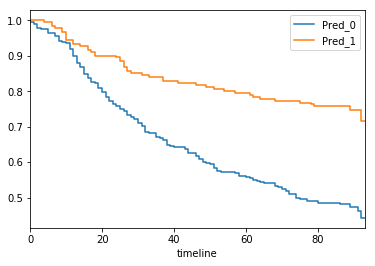

In [0]:
tree1 = make_works(['FOXP3/CD8-central_intraepithelial', 'Fibrosis_central', 'Fibrosis_central_percentage'], 3)

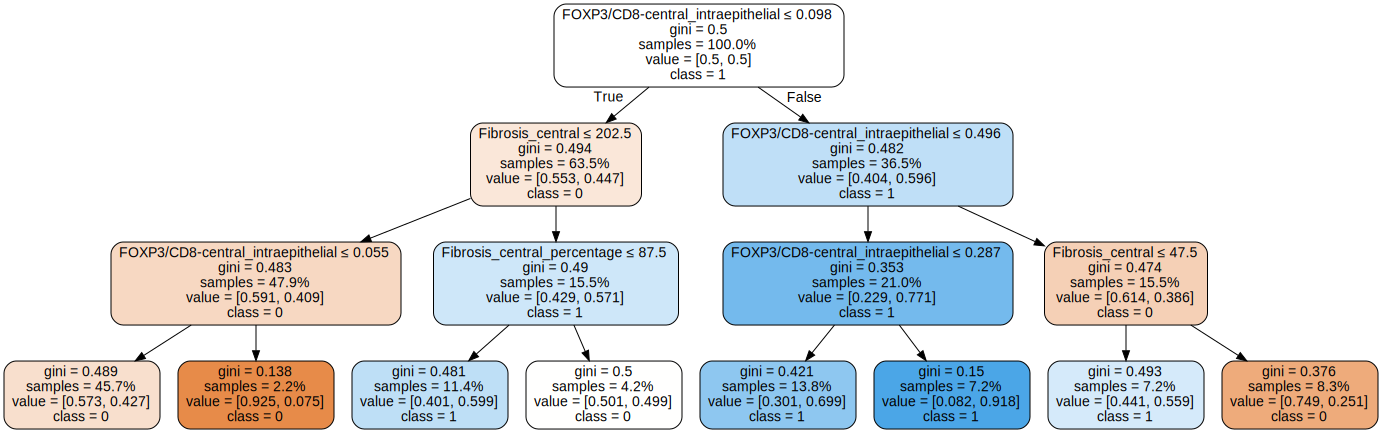

In [0]:
tree1['tree graph']

** FOXP3/CD8 for FOXP3/CD8-central_intraepithelial, Fibrosis for Fibrosis_central

1. Pred 0
- **FOXP3/CD8 <= 0.098, Fibrosis <= 202.5**
- 0.496 < FOXP3/CD8 <= 1.909, Fibrosis<= 47.5
- 0.496 < FOXP3/CD8, Fibrosis > 47.5

2. Pred 1
- FOXP3/CD8 <= 0.098, Fibrosis > 202.5
- **0.098 < FOXP3/CD8 <= 0.496**
- 1.909 < FOXP3/CD8, Fibrosis <= 47.5



{'AUC': 0.6875393081761006, 'accuracy': 0.6301969365426696, 'precision': 0.7637362637362637, 'recall': 0.5245283018867924, 'f1': 0.6219239373601789, 'mcc': 0.3030519593925592}
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
          38.10 <0.005     30.47
<lifelines.StatisticalResult: (0, 1)>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
     test_statistic      p  -log2(p)
0 1           38.10 <0.005     30.47


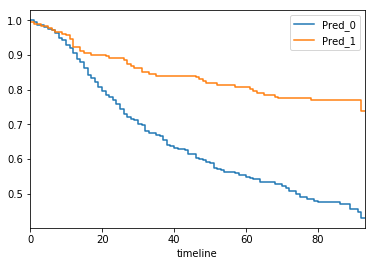

In [0]:
tree2 = make_works(['FOXP3-periphery_intraepithelial', 'Fibrosis_periphery_percentage'])

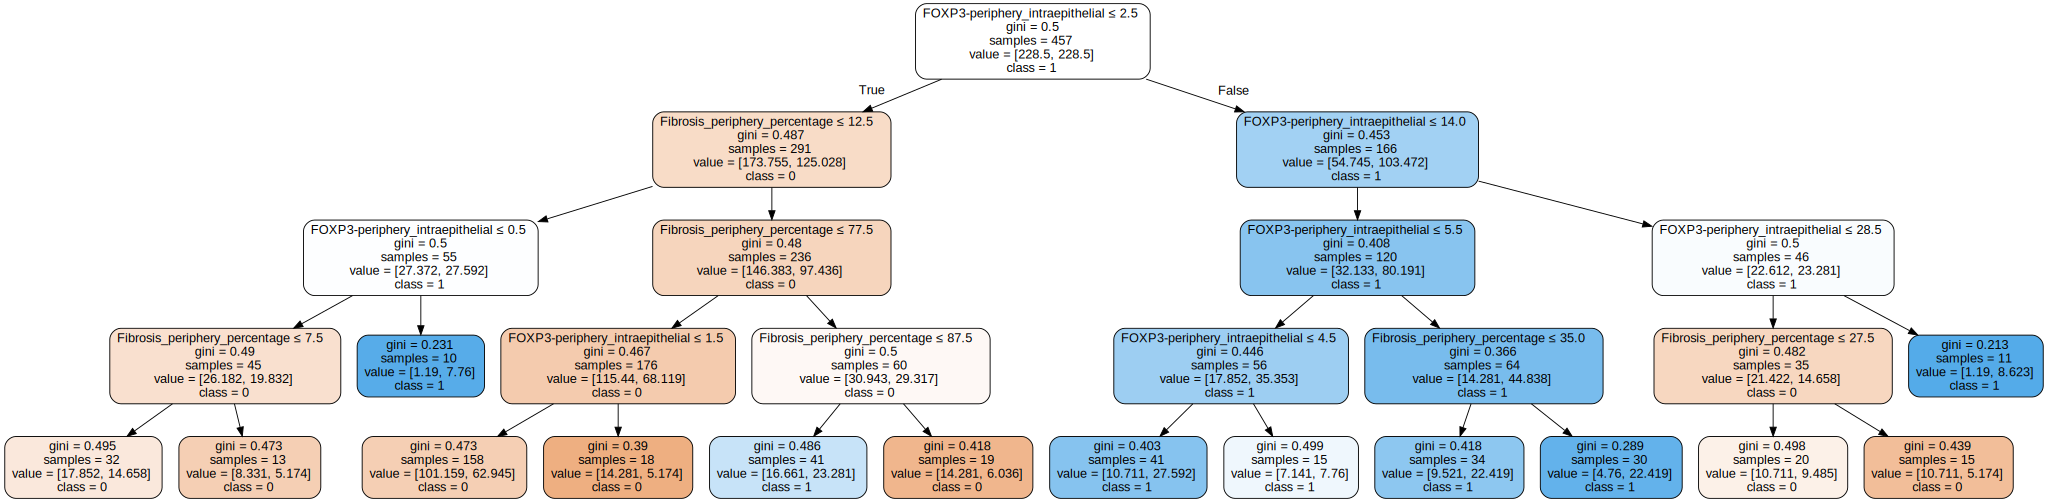

In [0]:
tree2['tree graph']

** FOXP3 for FOXP3-periphery_intraepithelial, Fibrosis for Fibrosis_periphery_percentage

1. Pred 0
- FOXP3 <= 0.5, Fibrosis <= 7.5
- **FOXP3 <= 2,5, 12.5 < Fibrosis <= 77.5**
- FOXP3 <= 2.5, 87.5 < Fibrosis
- 14 < FOXP3 <= 28.5

2. Pred 1
- 0.5 < FOXP3 <= 2.5, Fibrosis <= 12.5
- FOXP3 <= 2.5, 77.5 < Fibrosis <= 87.5
- **2.5 < FOXP3 <= 14**
- 28.5 < FOXP3

{'AUC': 0.6859768081761006, 'accuracy': 0.6170678336980306, 'precision': 0.7556818181818182, 'recall': 0.5018867924528302, 'f1': 0.6031746031746031, 'mcc': 0.2819012989916798}
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
          35.04 <0.005     28.21
<lifelines.StatisticalResult: (0, 1)>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
     test_statistic      p  -log2(p)
0 1           35.04 <0.005     28.21


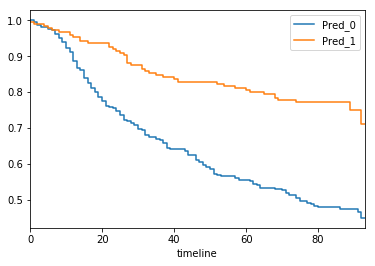

In [0]:
tree3 = make_works(['CD8_periphery_intra', 'Fibrosis_periphery_percentage'])

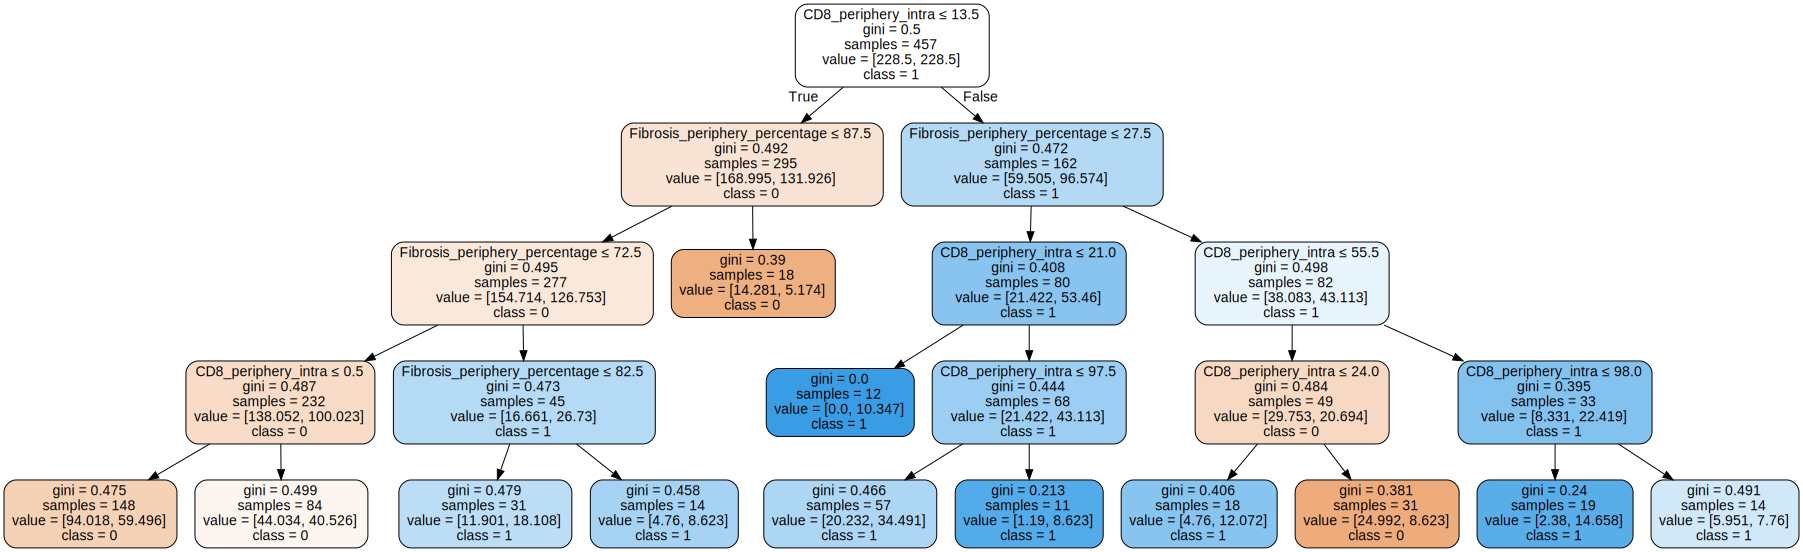

In [0]:
tree3['tree graph']

** CD8 for CD8_periphery_intra, Fibrosis for Fibrosis_periphery_percentage

1. Pred 0
- **CD8 <= 13.5, Fibrosis <= 72.5**
- CD8 <= 13.5, Fibrosis > 87.5
- 24 < CD8 <= 55.5, 27.5 < Fibrosis 

2. Pred 1
- CD8 <= 13.5, 72.5 < Fibrosis <= 87.5
- **CD8 > 13.5, Fibrosis <= 27.5**
- 13.5 < CD8 <= 24, Fibrosis > 27.5
- 55.5 < CD8, Fibrosis > 27.5

In [0]:
df.columns
"""
CD68- fibrosis peripheral
CD68- fibrosis central
CD163- fibrosis peripheral
CD163-fibrosis central
CD163/CD68- fibrosis peripheral
CD163/CD68- fibrosis central
CD68-CD163- fibrosis peripheral
CD68-CD163- fibrosis central
CD8,periphery,intraepithelial - fibrosis periphery
CD8,central,intraepithelial- fibrosis central
FOXP3/CD8,periphery,intraepitnelial - fibrosis periphery
FOXP3/CD8,central,intraepithelial - fibrosis central
"""

Index(['순번', '검사번호', 'TMANo.', 'CD68', 'CD163', 'CD163/CD68', 'CD68-CD163',
       'FOXP3-periphery_intraepithelial',
       'FOXP3/CD8-periphery_intraepithelial', 'FOXP3-periphery_stromaladj',
       'FOXP3/CD8-periphery_stromaladj', 'FOXP3-periphery_stromalfar',
       'FOXP3/CD8-periphery_stromalfar', 'FOXP3-central_intraepithelial',
       'FOXP3/CD8-central_intraepithelial', 'FOXP3-central_stromaladj',
       'FOXP3CD8-central_stromaladj', 'FOXP3-central_stromalfar',
       'FOXP3CD8-central_stromalfar', 'CD8_periphery_intra',
       'CD8_periphery_stromaladj', 'CD8_periphery_stromalfar',
       'CD8_central_intra', 'CD8_central_stromaladj', 'CD8_central_stromalfar',
       'Immuneperi', 'Fibrosis_periphery_intensity',
       'Fibrosis_periphery_percentage', 'Fibrosis_peripheral', 'fibrosisp50',
       'fibrosisp150', 'fibrosisp200', 'fibrosisp100', 'Fibrosis_pattern',
       'Fibrosis with inflammation_periphery', 'Fibrosis_central_intensity',
       'Fibrosis_central_percentage'

CD68-Fibrosis_peripheral
{'AUC': 0.6042354559748427, 'accuracy': 0.6280087527352297, 'precision': 0.6240208877284595, 'recall': 0.9018867924528302, 'f1': 0.7376543209876544, 'mcc': 0.20350651409701673}
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
          16.68 <0.005     14.46
<lifelines.StatisticalResult: (0, 1)>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
     test_statistic      p  -log2(p)
0 1           16.68 <0.005     14.46
CD68-Fibrosis_central
{'AUC': 0.6444673742138366, 'accuracy': 0.5645514223194749, 'precision': 0.7012195121951219, 'recall': 0.4339622641509434, 'f1': 0.5361305361305361, 'mcc': 0.18393882923154392}
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
          16.01 <0.005     13.95
<lifelines.StatisticalResult: (0, 1)>
  

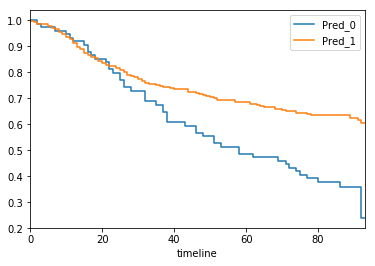

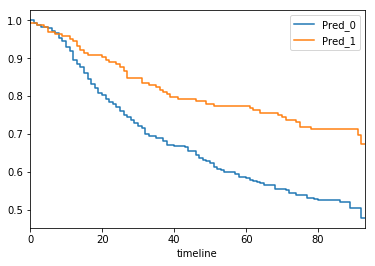

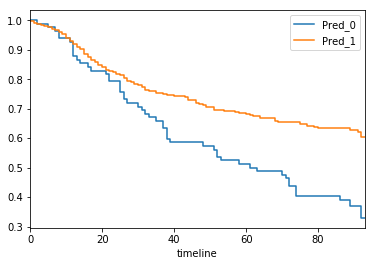

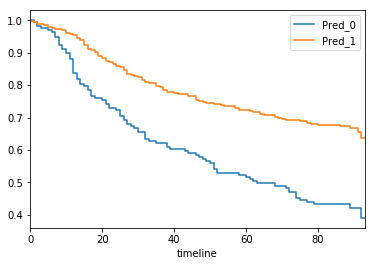

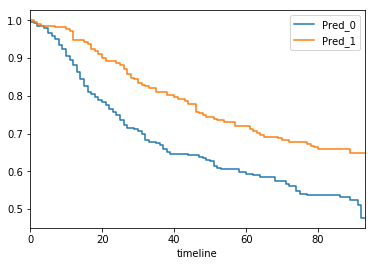

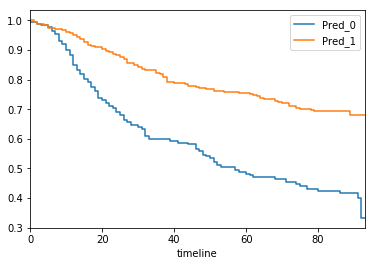

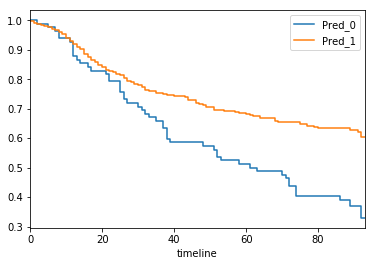

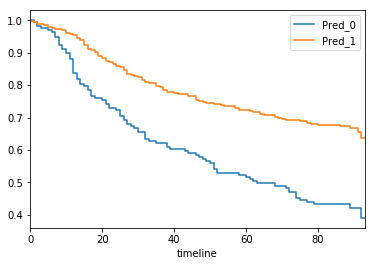

In [0]:
## many trees of ['CD68', 'CD163', 'CD163/CD68', ['CD68', 'CD163']] and ['Fibrosis_peripheral', 'Fibrosis_central']
trees1 = dict()
for i in ['CD68', 'CD163', 'CD163/CD68', ['CD68', 'CD163']]:
  for j in ['Fibrosis_peripheral', 'Fibrosis_central']:
    if type(i) == list:
      cols = i + [j]
    else:
      cols = [i, j]
    print('-'.join(cols))
    trees1['-'.join(cols)] = make_works(cols)

{'AUC': 0.682871462264151, 'accuracy': 0.6542669584245077, 'precision': 0.6877192982456141, 'recall': 0.7396226415094339, 'f1': 0.7127272727272727, 'mcc': 0.2812699769818563}
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
          41.14 <0.005     32.72
<lifelines.StatisticalResult: (0, 1)>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
     test_statistic      p  -log2(p)
0 1           41.14 <0.005     32.72


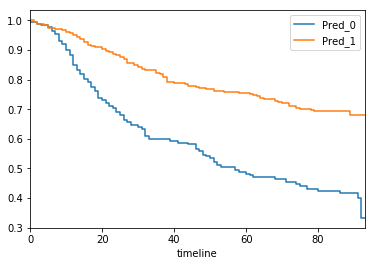

In [0]:
## only pair CD163/CD68-Fibrosis_central scores high performance
tree5 = make_works(['CD163/CD68', 'Fibrosis_central'])

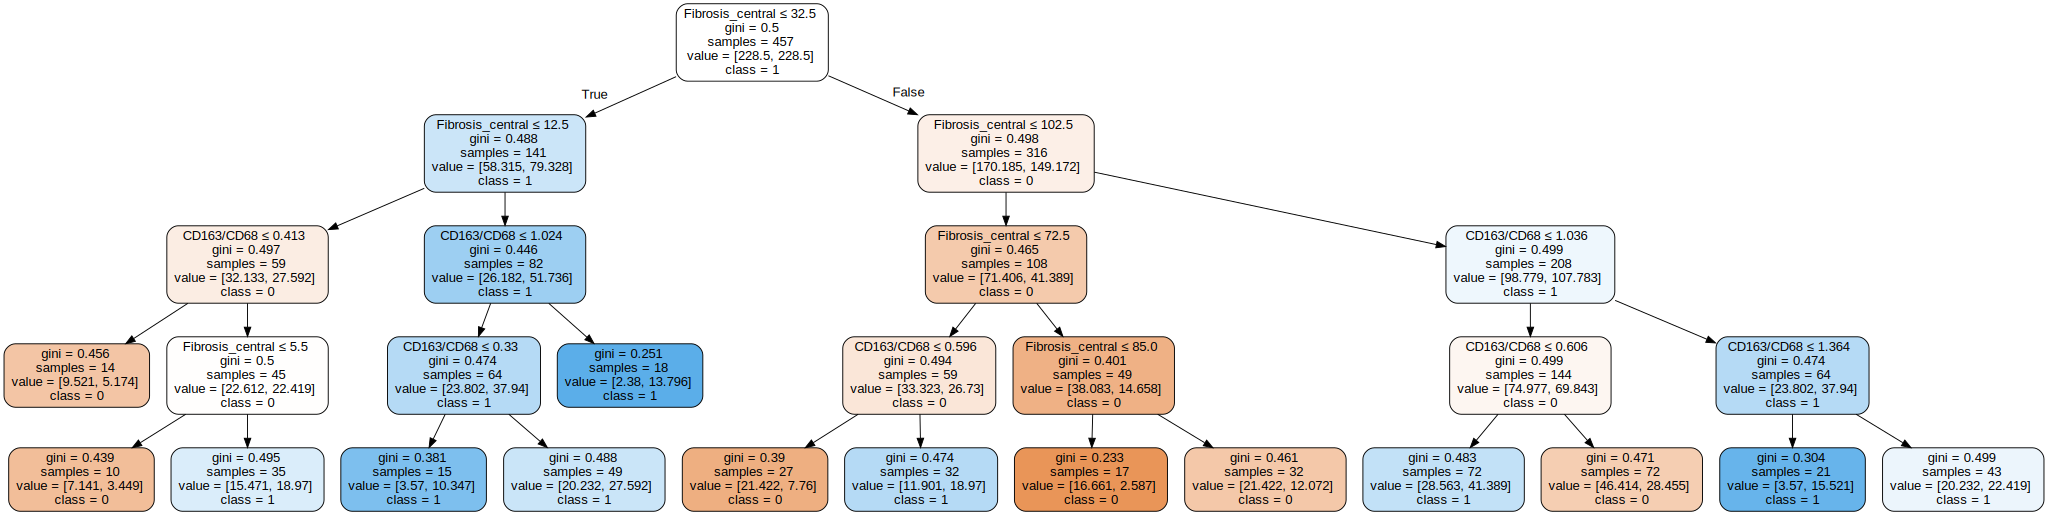

In [0]:
tree5['tree graph']

** CDs for CD163/CD68, Fibrosis for Fibrosis_central

1. Pred 0
- CDs <= 0.413, Fibrosis <= 12.5
- CDs > 0.413, 5.5 < Fibrosis <= 12.5
- CDs <= 0.596, 32.5 < Fibrosis <= 72.5
- 72.5 < Fibrosis
- **0.606 < CDs <= 1.036, Fibrosis > 102.5**

2. Pred 1
- CDs > 0.413, 5.5 < Fibrosis <= 12.5
- **12.5 < Fibrosis <= 32.5**
- 0.596 < CDs, 32.5 < Fibrosis <= 72.5
- CDs <= 0.606, 102.5 < Fibrosis
- 1.036 < CDs, 102.5 < Fibrosis

CD8_periphery_intra-Fibrosis_peripheral
{'AUC': 0.6967374213836478, 'accuracy': 0.6542669584245077, 'precision': 0.6851211072664359, 'recall': 0.7471698113207547, 'f1': 0.7148014440433214, 'mcc': 0.2796848420654611}
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
          37.37 <0.005     29.93
<lifelines.StatisticalResult: (0, 1)>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
     test_statistic      p  -log2(p)
0 1           37.37 <0.005     29.93
CD8_central_intra-Fibrosis_central
{'AUC': 0.6961084905660377, 'accuracy': 0.6301969365426696, 'precision': 0.7181818181818181, 'recall': 0.5962264150943396, 'f1': 0.6515463917525773, 'mcc': 0.26998719093468077}
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
          31.73 <0.005     25.75
<lifelines.St

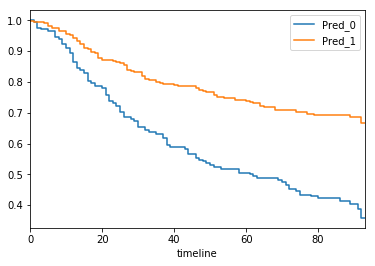

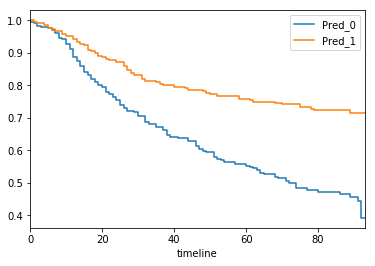

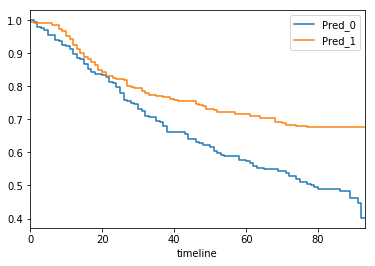

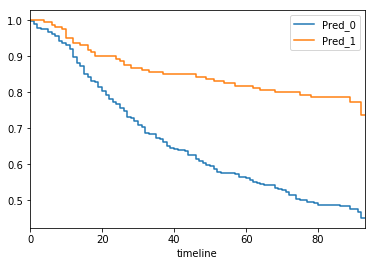

In [0]:
trees2 = dict()
for i in [['CD8_periphery_intra', 'Fibrosis_peripheral'], ['CD8_central_intra', 'Fibrosis_central'], ['FOXP3/CD8-periphery_intraepithelial', 'Fibrosis_peripheral'], ['FOXP3/CD8-central_intraepithelial', 'Fibrosis_central']]:
  print('-'.join(i))
  trees2['-'.join(i)] = make_works(i)

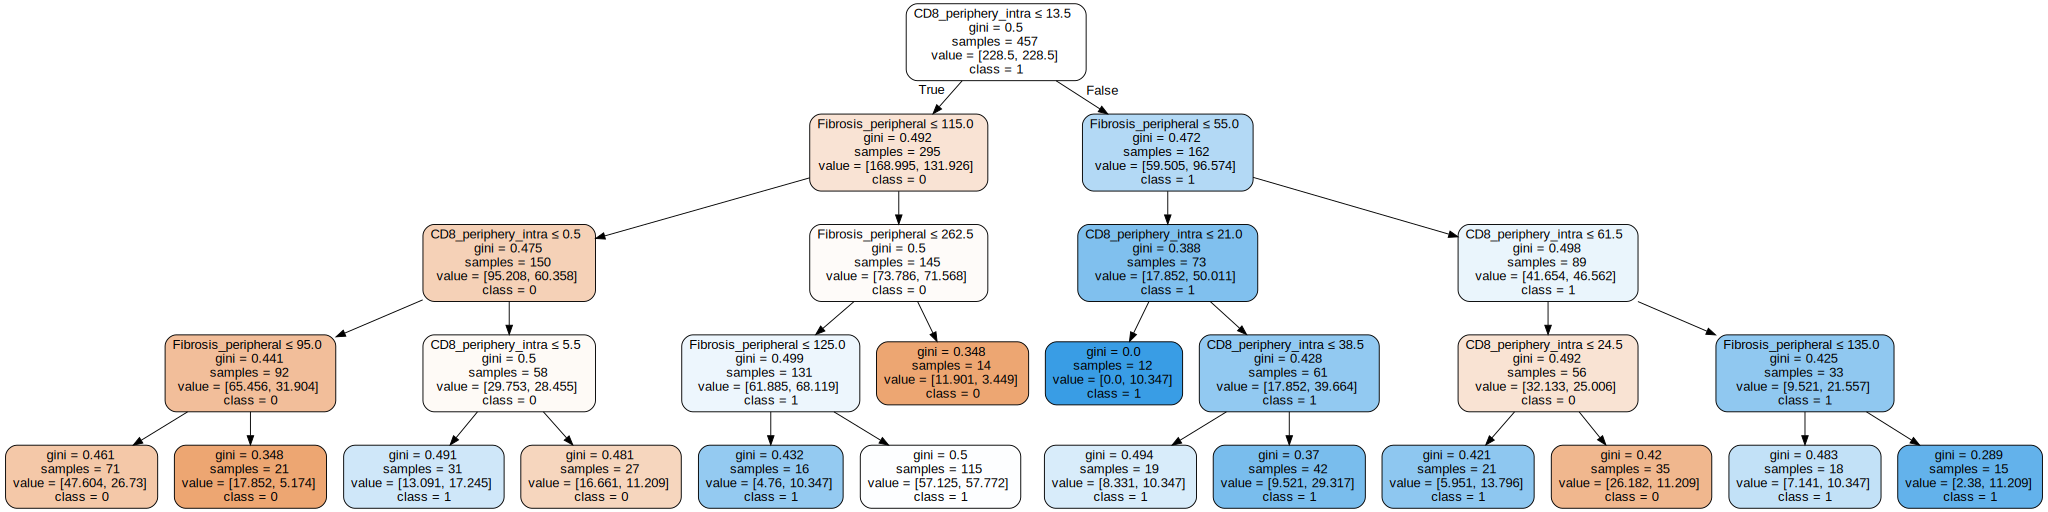

In [0]:
trees2['CD8_periphery_intra-Fibrosis_peripheral']['tree graph']  ## with first figure of survival analysis

** CD8 for CD8_periphery_intra, Fibrosis for Fibrosis_peripheral

1. Pred 0
- **CD8 <= 0.5, Fibrosis <= 115**
- 5.5 < CD8 <= 13.5, Fibrosis <= 115
- CD8 < 13.5, 262.5 < Fibrosis
- 24.5 < CD8 <= 61.5, 55 < Fibrosis  

2. Pred 1
- 0.5 < CD8 <= 5.5, Fibrosis <= 115
- **CD8 <= 13.5, 115 < Fibrosis <= 262.5**
- 13.5 < CD8, Fibrosis <= 55
- 13.5 < CD8 <= 24.5, Fibrosis > 55
- CD8 > 61.5, Fibrosis > 55

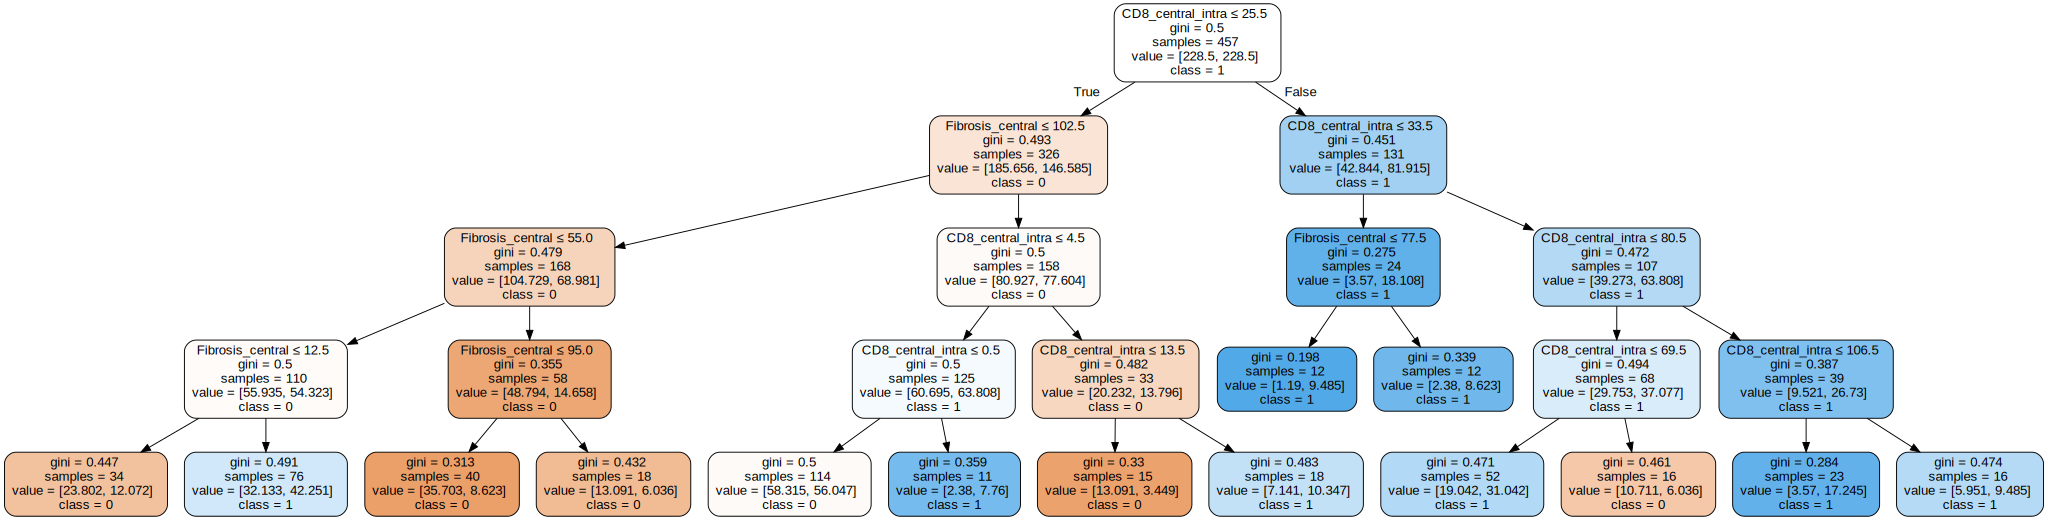

In [0]:
trees2['CD8_central_intra-Fibrosis_central']['tree graph']  ## with second figure of survival analysis

** CD8 for CD8_central_intra, Fibrosis for Fibrosis_central

1. Pred 0
- CD8 <= 25.5, Fibrosis <= 12.5
- **CD8 <= 25.5, 55 < Fibrosis <= 102.5**
- 4.5 < CD8 <= 13.5, Fibrosis <= 102.5 
- 69.5 < CD8 <= 80.5

2. Pred 1
- CD8 <= 25.5, 12.5 < Fibrosis <= 55
- **CD8 <= 4.5, 102.5 < Fibrosis**
- 13.5 < CD8 <= 25.5, 102.5 < Fibrosis
- 25.5 < CD8 <= 35.5
- 33.5 < CD8 <= 69.5
-  80.5 < CD8

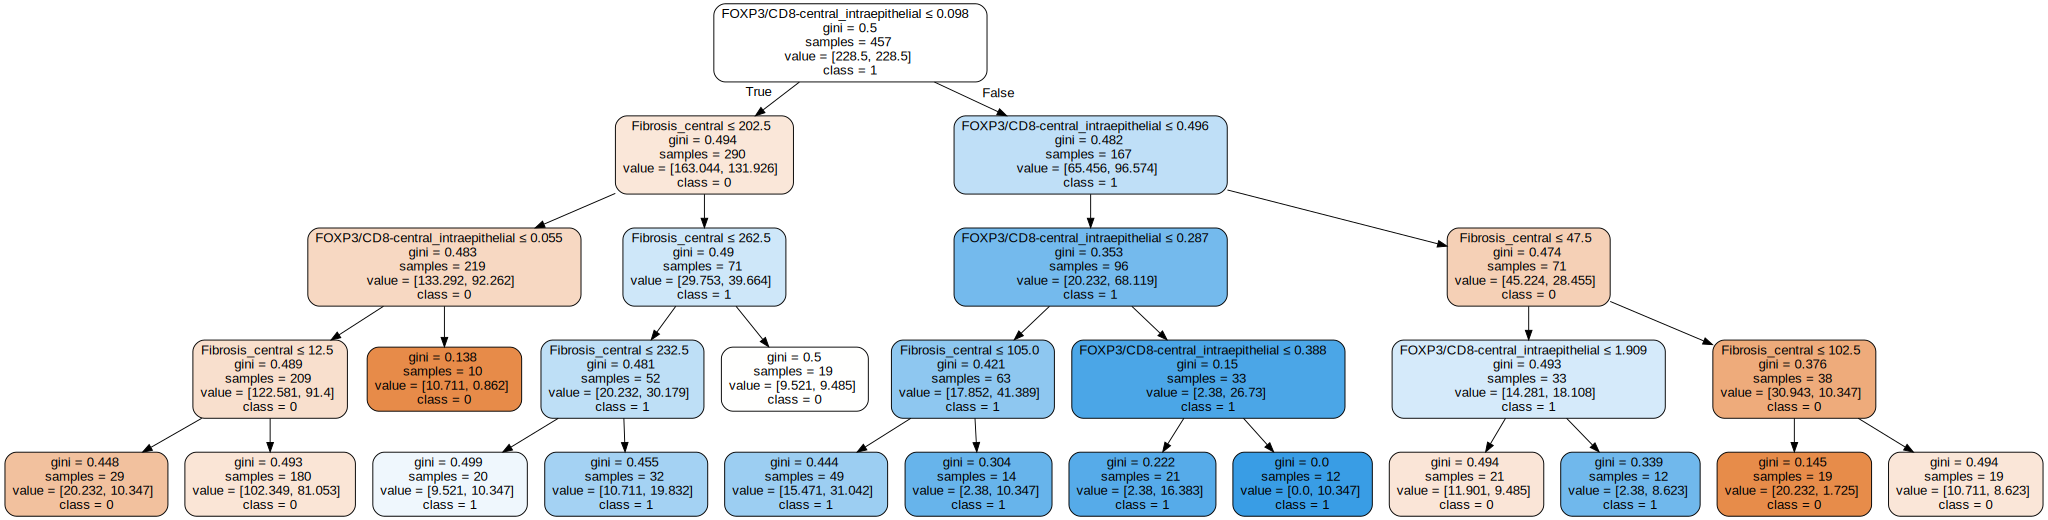

In [0]:
trees2['FOXP3/CD8-central_intraepithelial-Fibrosis_central']['tree graph']  ## with forth figure of survival analysis

** FOXP3/CD8 for FOXP3/CD8-central_intraepithelial, Fibrosis for Fibrosis_central

1. Pred 0
- **FOXP3/CD8 <= 0.098, Fibrosis <= 202.5**
- 0.496 < FOXP3/CD8 <= 1.909, Fibrosis <= 47.5
- 0.496 < FOXP3/CD8, 47.5 < Fibrosis

2. Pred 1
- FOXP3/CD8 <= 0.098, 202.5 < Fibrosis
- **0.098 < FOXP3/CD8 <= 0.496**
- FOXP3/CD8 > 1.909, 47.5 < Fibrosis



{'AUC': 0.6594437893081762, 'accuracy': 0.6105032822757112, 'precision': 0.6835443037974683, 'recall': 0.6113207547169811, 'f1': 0.6454183266932271, 'mcc': 0.21801281223971886}
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
          20.69 <0.005     17.50
<lifelines.StatisticalResult: (0, 1)>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
     test_statistic      p  -log2(p)
0 1           20.69 <0.005     17.50


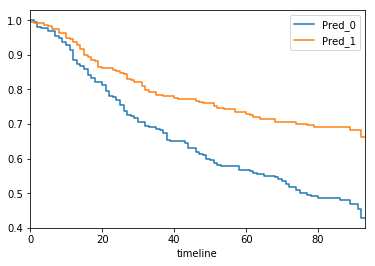

In [0]:
new_tree1 = make_works(['CD8_periphery_intra', 'Fibrosis_peripheral'], 3)

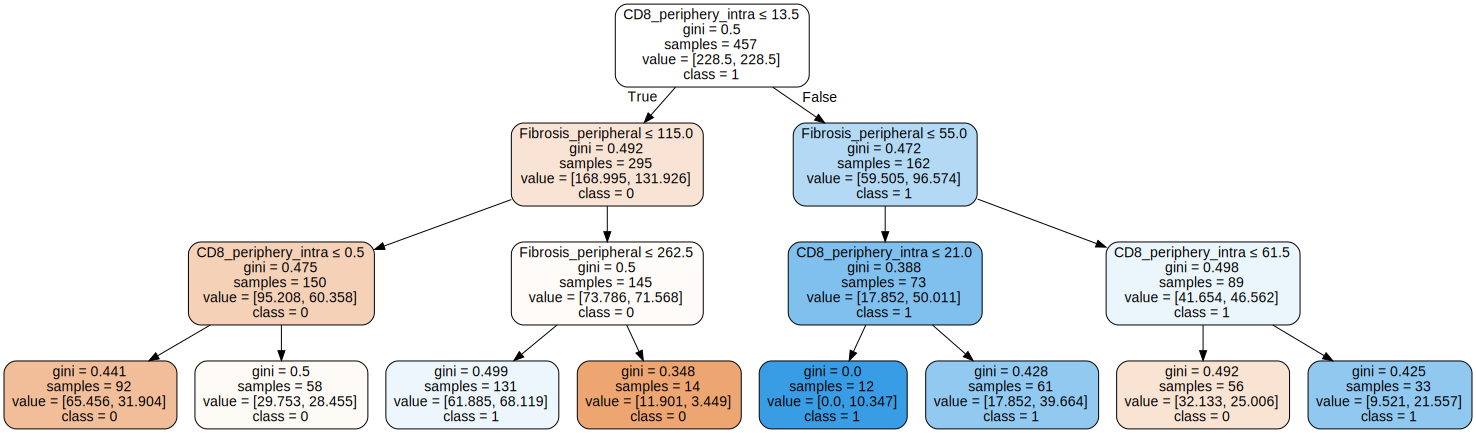

In [0]:
new_tree1['tree graph']

** Conditions of Rule, Rule Rank(Samples of Rule)

1. Pred 0
- CD8 <= 13.5, Fib <= 115, 1(150)
- CD8 <= 13.5, 262.5 < Fib, 3(14)
- 13.5 < CD8 <= 61.5, 55 < Fib <= 61.5, 2(56)

2. Pred 1
- CD8 <= 13.5, 115 < Fib < 262.5, 1(131)
- CD8 > 13.5, Fib <= 55, 2(73)
- 61.5 < CD8, 55 < Fib, 3(33)

{'AUC': 0.6469929245283018, 'accuracy': 0.5995623632385121, 'precision': 0.66015625, 'recall': 0.6377358490566037, 'f1': 0.6487523992322456, 'mcc': 0.1835746714676188}
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
          16.71 <0.005     14.49
<lifelines.StatisticalResult: (0, 1)>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
     test_statistic      p  -log2(p)
0 1           16.71 <0.005     14.49


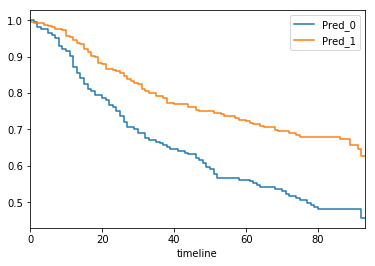

In [0]:
new_tree2 = make_works(['CD8_central_intra', 'Fibrosis_central'], 3)

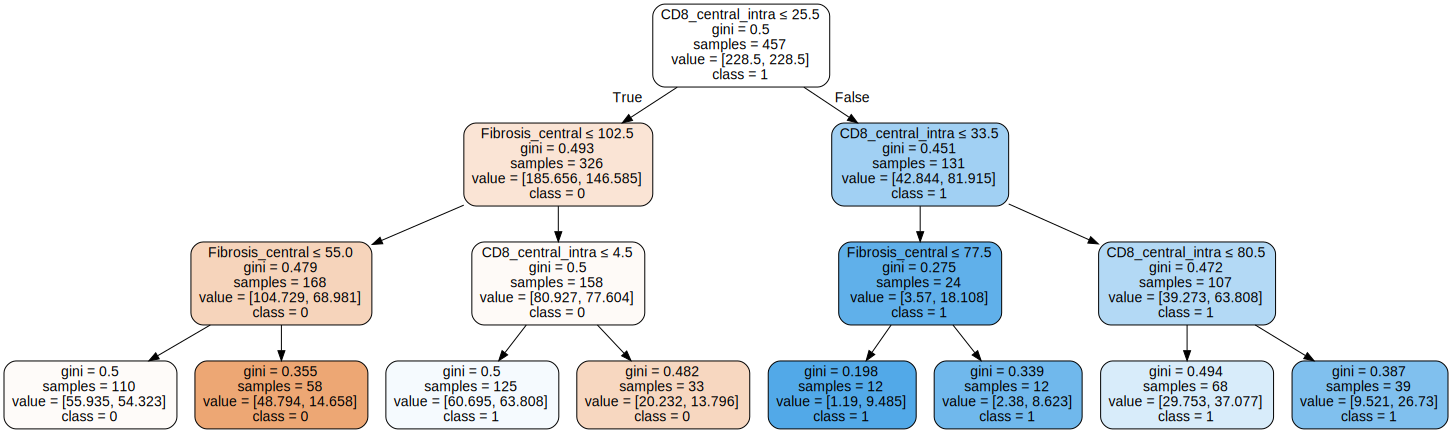

In [0]:
new_tree2['tree graph']

1. Pred 0
- CD8 <= 25.5, Fib <= 102.5, 1(201)
- 4.5 < CD8 <= 25.5, 102.5 < Fib, 2(33)

2. Pred 1
- 25.5 < CD8, 1(131)
- CD8 <= 4.5, 102.5 < Fib, 2(125)

{'AUC': 0.6157036163522012, 'accuracy': 0.5557986870897156, 'precision': 0.691358024691358, 'recall': 0.4226415094339623, 'f1': 0.5245901639344263, 'mcc': 0.1673872590759761}
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
          11.73 <0.005     10.66
<lifelines.StatisticalResult: (0, 1)>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
     test_statistic      p  -log2(p)
0 1           11.73 <0.005     10.66


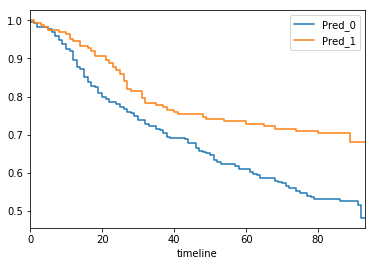

In [0]:
new_tree1_depth2 = make_works(['CD8_periphery_intra', 'Fibrosis_peripheral'], 2)

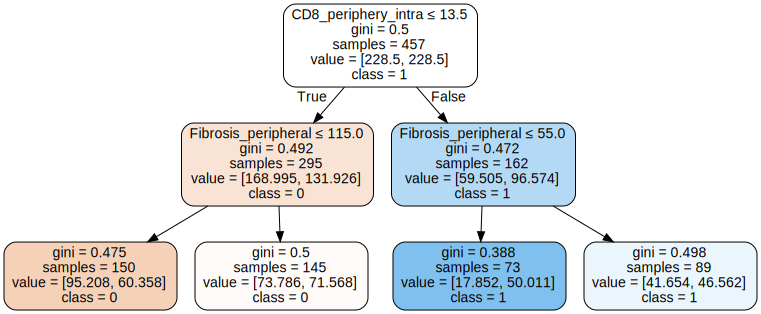

In [0]:
new_tree1_depth2['tree graph']

{'AUC': 0.7143081761006288, 'accuracy': 0.6673960612691466, 'precision': 0.6982456140350877, 'recall': 0.7509433962264151, 'f1': 0.7236363636363636, 'mcc': 0.30872218303596927}
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
          43.74 <0.005     34.63
<lifelines.StatisticalResult: (0, 1)>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
     test_statistic      p  -log2(p)
0 1           43.74 <0.005     34.63


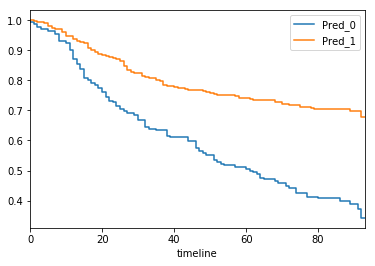

In [0]:
new_tree2_depth2 = make_works(['CD8_central_intra', 'Fibrosis_central'], 5)

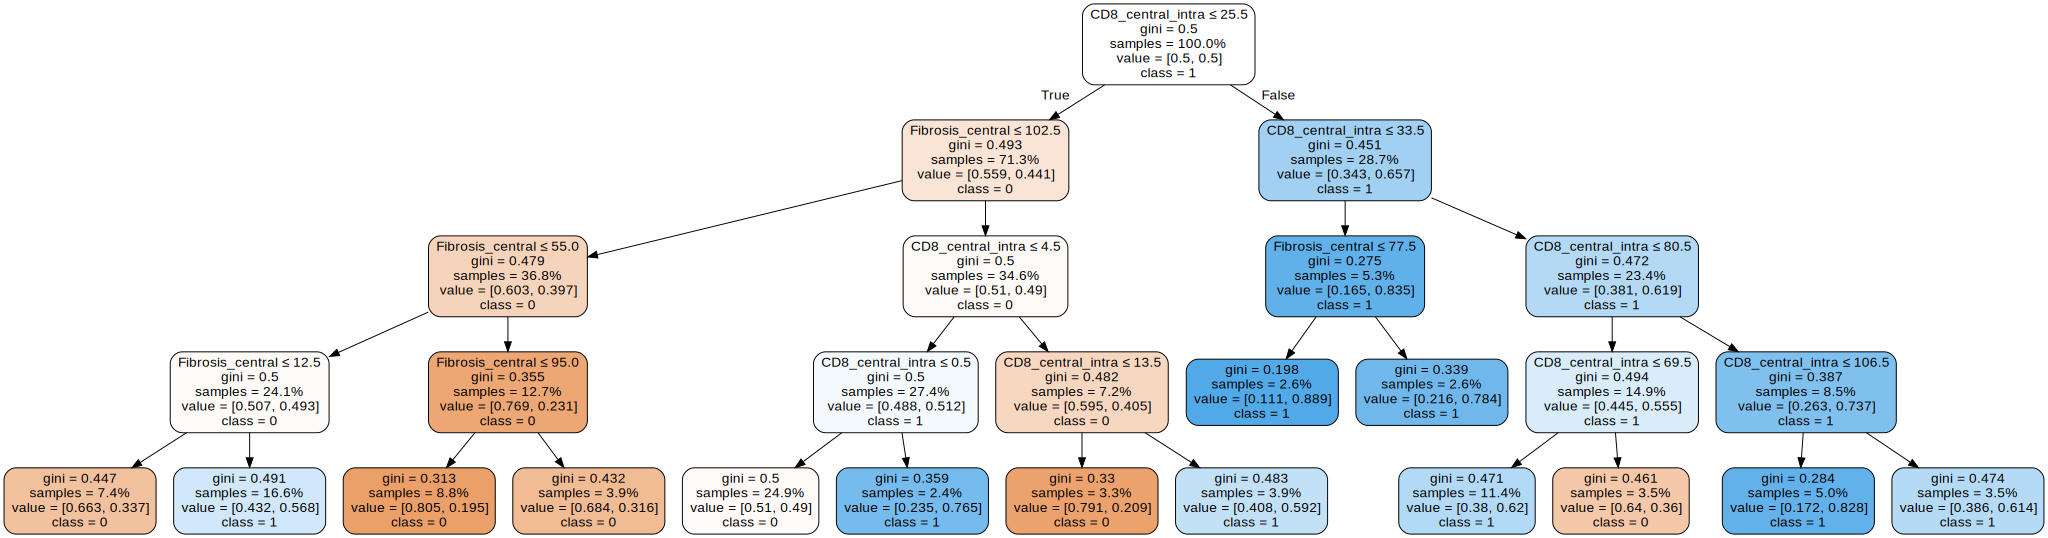

In [0]:
new_tree2_depth2['tree graph']

In [0]:
import plotly.express as px

df['y'] = list(map(lambda x: str(x), y))
fig = px.scatter(df, x="CD8_central_intra", y="Fibrosis_central", color="y")
fig.show()

In [0]:
fig_CD8 = px.histogram(df, x="CD8_central_intra", color="y")
fig_CD8.show()

In [0]:
fig_Fib = px.histogram(df, x="Fibrosis_central", color="y")
fig_Fib.show()

In [0]:
df['CD8_log'] = np.log(df['CD8_central_intra'])
df['CD8_log'].loc[df['CD8_log'] == -np.inf] = 0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [0]:
min(df['CD8_log'].loc[df['CD8_log'] != -np.inf])

0.0

In [0]:
fig_CD8_ = px.histogram(df, x="CD8_log", color="y")
fig_CD8_.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

In [0]:
mm = sc.fit_transform(df[['CD8_log', 'Fibrosis_central']])

In [0]:
mm = pd.DataFrame(mm, columns = ['CD8_log_minmax', 'Fib_minmax'])
mm['y'] = df['y'].reset_index(drop=True)

In [0]:
fig_cd8_mm = px.histogram(mm, x="CD8_log_minmax", color="y")
fig_cd8_mm.show()

In [0]:
fig_fib_mm = px.histogram(mm, x="Fib_minmax", color="y")
fig_fib_mm.show()

In [0]:
from sklearn.model_selection import train_test_split

tr_idx, ts_idx, tr_y, ts_y = train_test_split(range(len(df)), y, test_size=0.3) 

In [0]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(class_weight='balanced', max_iter=10).fit(mm[['CD8_log_minmax', 'Fib_minmax']].iloc[tr_idx], tr_y)
pred = clf.predict(mm.drop(['y'], 1).iloc[ts_idx])
prob = clf.predict_proba(mm.drop(['y'], 1).iloc[ts_idx])[:, 1]
tree_modeling.compute_performance(ts_y, pred, prob)

{'AUC': 0.5113516922430104, 'accuracy': 0.5072463768115942, 'precision': 0.5254237288135594, 'recall': 0.43661971830985913, 'f1': 0.4769230769230769, 'mcc': 0.018900960716069105}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



{'AUC': 0.5113516922430104,
 'accuracy': 0.5072463768115942,
 'f1': 0.4769230769230769,
 'mcc': 0.018900960716069105,
 'precision': 0.5254237288135594,
 'recall': 0.43661971830985913}

In [0]:
clf.coef_

array([[ 0.93620258, -0.11866808]])

In [0]:
clf.intercept_

array([-0.27600869])

In [0]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(20, )).fit(mm.drop(['y'], 1).iloc[tr_idx], tr_y)
nn_pred = nn.predict(mm.drop(['y'], 1).iloc[ts_idx])
nn_prob = nn.predict_proba(mm.drop(['y'], 1).iloc[ts_idx])[:, 1]
tree_modeling.compute_performance(ts_y, nn_pred, nn_prob)

{'AUC': 0.5287996636535631, 'accuracy': 0.5144927536231884, 'precision': 0.5144927536231884, 'recall': 1.0, 'f1': 0.679425837320574, 'mcc': 0.0}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:872: RuntimeWarning:

invalid value encountered in double_scalars



{'AUC': 0.5287996636535631,
 'accuracy': 0.5144927536231884,
 'f1': 0.679425837320574,
 'mcc': 0.0,
 'precision': 0.5144927536231884,
 'recall': 1.0}

In [0]:
cols = ['CD8_central_intra', 'Fibrosis_central']
tree_ = tree_modeling.tree_model_with_performance([df[['CD8_central_intra', 'Fibrosis_central']].reset_index(drop=True).iloc[tr_idx], tr_y], 20, 3, [df[['CD8_central_intra', 'Fibrosis_central']].reset_index(drop=True).iloc[ts_idx], ts_y])

{'AUC': 0.5763085978557915, 'accuracy': 0.5942028985507246, 'precision': 0.5742574257425742, 'recall': 0.8169014084507042, 'f1': 0.6744186046511629, 'mcc': 0.1975681243316368}


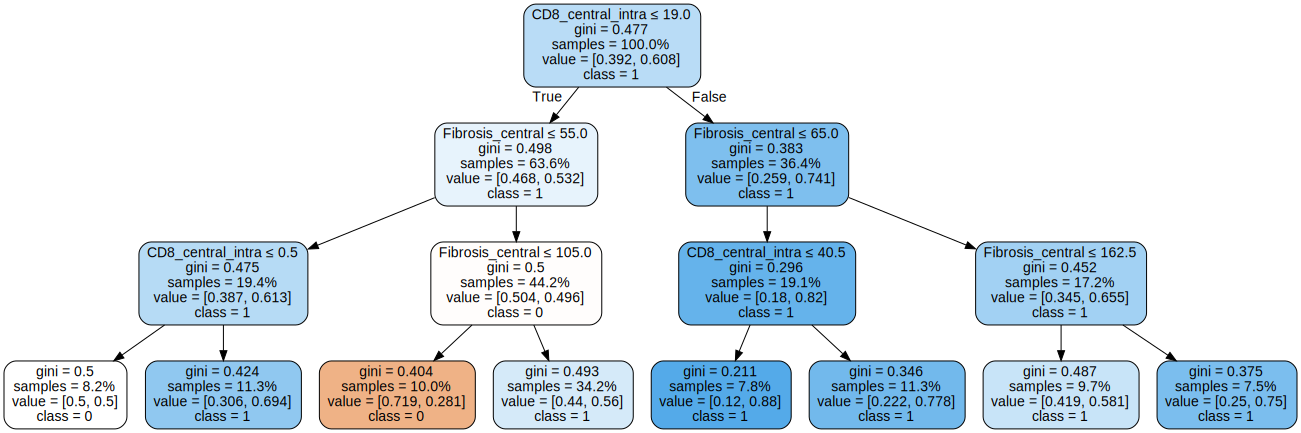

In [0]:
tree_['tree graph']

In [0]:
tree_['feature importance']

,feature,importance
0,CD8_central_intra,0.518516
1,Fibrosis_central,0.481484


In [0]:
pd.value_counts(ts_y) 

1    71
0    67
dtype: int64

In [0]:
pd.value_counts(y) / len(y)

1    0.579869
0    0.420131
dtype: float64

In [0]:
!pip install lightgbm

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(n_estimators=10).fit(df[cols].reset_index(drop=True).iloc[tr_idx], tr_y)

In [0]:
rf_pred = rf.predict(df[cols].reset_index(drop=True).iloc[ts_idx])
rf_prob = rf.predict_proba(df[cols].reset_index(drop=True).iloc[ts_idx])[:, 1]
tree_modeling.compute_performance(ts_y, rf_pred, rf_prob)

{'AUC': 0.5991170906033214, 'accuracy': 0.5797101449275363, 'precision': 0.5942028985507246, 'recall': 0.5774647887323944, 'f1': 0.5857142857142856, 'mcc': 0.15948730132917738}


{'AUC': 0.5991170906033214,
 'accuracy': 0.5797101449275363,
 'f1': 0.5857142857142856,
 'mcc': 0.15948730132917738,
 'precision': 0.5942028985507246,
 'recall': 0.5774647887323944}

In [0]:
rf.feature_importances_

array([0.5616732, 0.4383268])